In [5]:
import pandas as pd
#Load dataset
data= pd.read_csv("index.csv")
#display first row
print(data.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv("index.csv")

# Check for missing values before filling
print("Missing values before filling:")
print(data.isnull().sum())

# Fill missing values
data['money'] = data['money'].fillna(data['money'].median())
data['card'] = data['card'].fillna(data['card'].mode()[0])

# Check again to confirm missing values are filled
print("\nMissing values after filling:")
print(data.isnull().sum())

Missing values before filling:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

Missing values after filling:
date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


In [7]:
# Convert 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Check the data types
print(data.dtypes)

date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


In [8]:
#Removing Outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['money'].quantile(0.25)
Q3 = data['money'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to exclude outliers
data = data[(data['money'] >= lower_bound) & (data['money'] <= upper_bound)]

# Confirm result
print("Outliers removed. Remaining rows:", len(data))

Outliers removed. Remaining rows: 1133


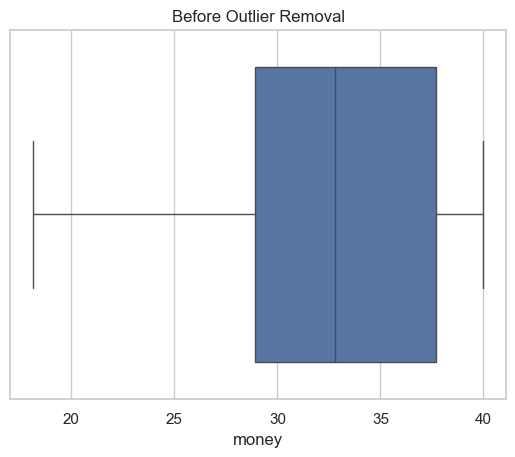

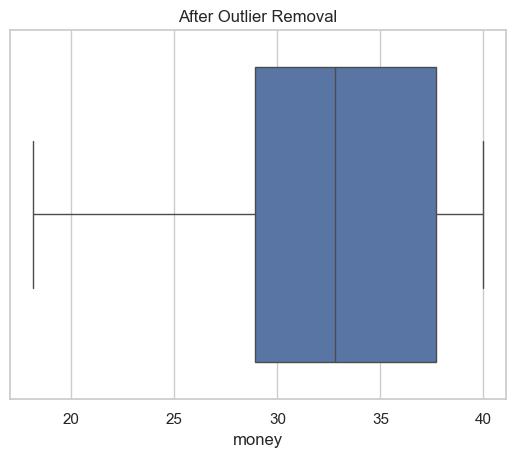

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before removal
sns.boxplot(x='money', data=pd.read_csv("index.csv"))
plt.title("Before Outlier Removal")
plt.show()

# After removal
sns.boxplot(x='money', data=data)
plt.title("After Outlier Removal")
plt.show()

In [10]:
### Feature Engineering
# Ensure 'datetime' column is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract features from 'datetime'
data['Month'] = data['datetime'].dt.month
data['Year'] = data['datetime'].dt.year
data['Day'] = data['datetime'].dt.day
data['Hour'] = data['datetime'].dt.hour
data['Weekday'] = data['datetime'].dt.day_name()  # Gives full weekday name (e.g., Monday)

# Extract part of day (Morning, Afternoon, Evening, Night)
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['Part_of_Day'] = data['Hour'].apply(get_part_of_day)

# Drop 'date' if it still exists
if 'date' in data.columns:
    data.drop(columns=['date'], inplace=True)

# Display sample
print(data[['datetime', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Part_of_Day']].head())


                 datetime  Year  Month  Day  Hour Weekday Part_of_Day
0 2024-03-01 10:15:50.520  2024      3    1    10  Friday     Morning
1 2024-03-01 12:19:22.539  2024      3    1    12  Friday   Afternoon
2 2024-03-01 12:20:18.089  2024      3    1    12  Friday   Afternoon
3 2024-03-01 13:46:33.006  2024      3    1    13  Friday   Afternoon
4 2024-03-01 13:48:14.626  2024      3    1    13  Friday   Afternoon


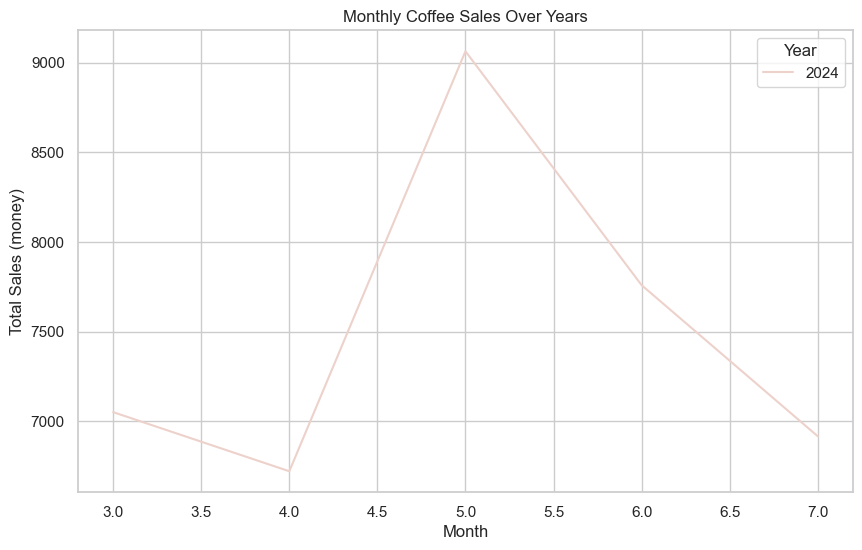

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Monthly Coffee Sales Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Month', y='money', hue='Year', estimator='sum', errorbar=None)
plt.title('Monthly Coffee Sales Over Years')
plt.ylabel('Total Sales (money)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.show()

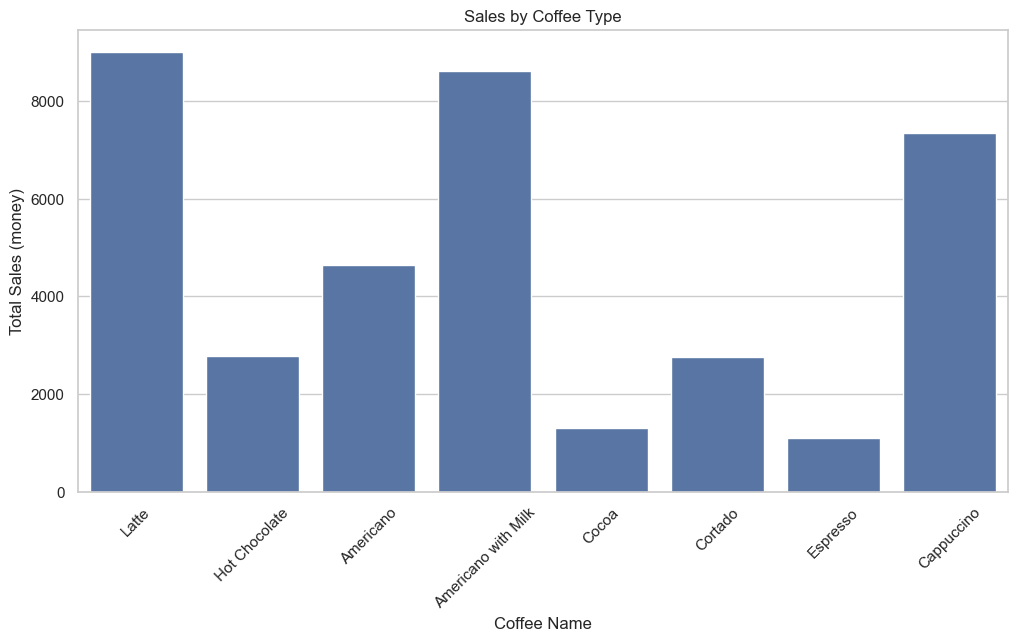

In [14]:
# 2. Sales by Coffee Type
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='coffee_name', y='money', estimator='sum', errorbar=None)
plt.title('Sales by Coffee Type')
plt.ylabel('Total Sales (money)')
plt.xlabel('Coffee Name')
plt.xticks(rotation=45)
plt.show()

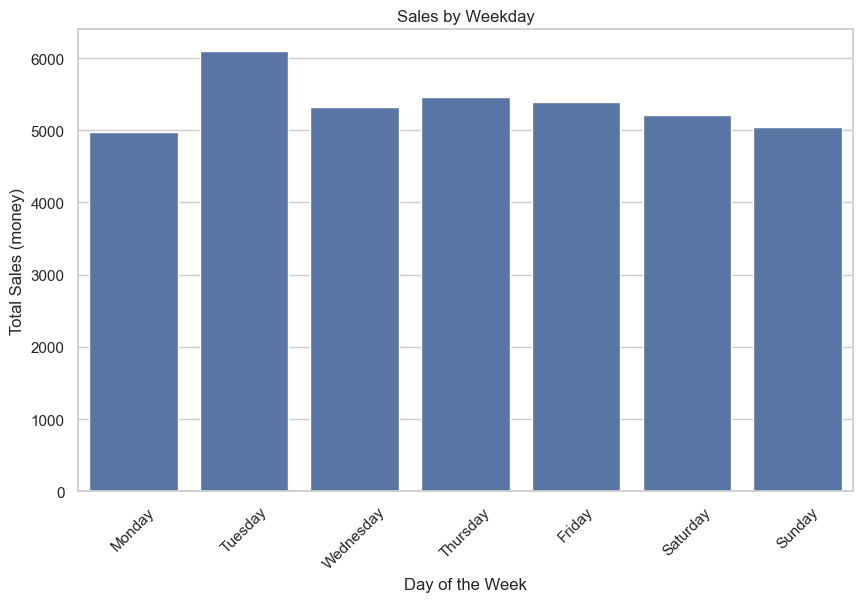

In [15]:
# 3. Sales by Weekday
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=data, x='Weekday', y='money', estimator='sum', order=order, errorbar=None)
plt.title('Sales by Weekday')
plt.ylabel('Total Sales (money)')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

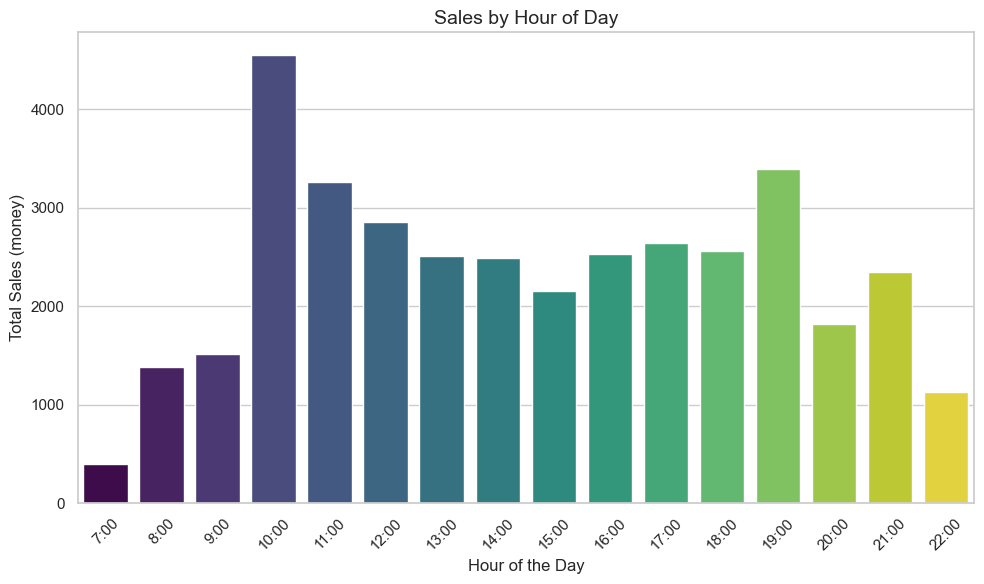

In [19]:
# 4. Sales by Hour of Day (Future-proofed)
plt.figure(figsize=(10, 6))

# Get sorted unique hour values from the data
unique_hours = sorted(data['Hour'].unique())
hour_labels = [f'{h}:00' for h in unique_hours]

sns.barplot(
    data=data,
    x='Hour',
    y='money',
    hue='Hour',  # Assign x to hue
    estimator='sum',
    errorbar=None,
    palette='viridis',
    legend=False,
    order=unique_hours
)

plt.title('Sales by Hour of Day', fontsize=14)
plt.ylabel('Total Sales (money)', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)
plt.xticks(ticks=range(len(unique_hours)), labels=hour_labels, rotation=45)
plt.tight_layout()
plt.show()

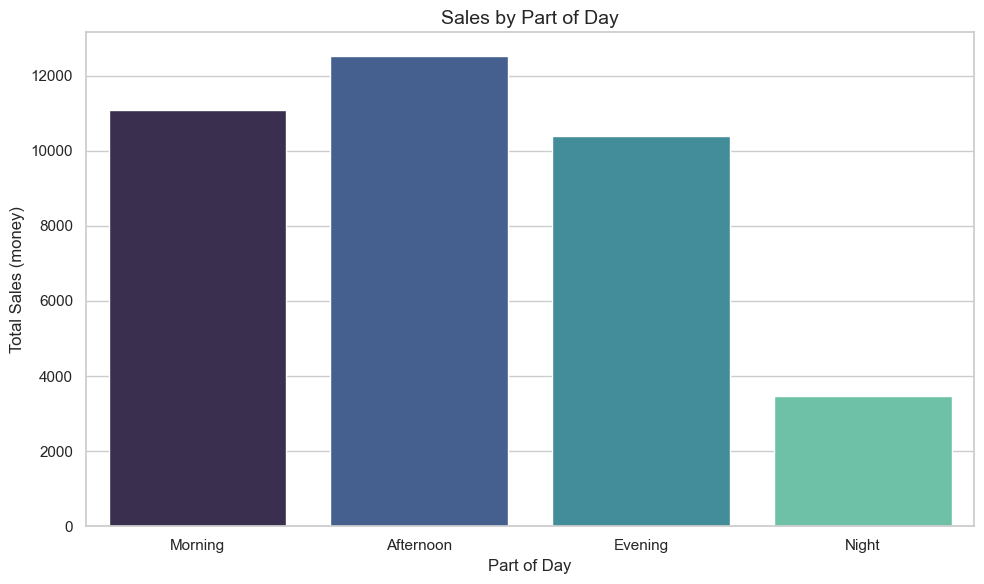

In [20]:
# 5. Sales by Part of Day (Enhanced & Future-Safe)
plt.figure(figsize=(10, 6))

part_order = ['Morning', 'Afternoon', 'Evening', 'Night']

sns.barplot(
    data=data,
    x='Part_of_Day',
    y='money',
    hue='Part_of_Day',      # Needed for palette usage
    estimator='sum',
    errorbar=None,
    palette='mako',
    order=part_order,
    legend=False            # Hide redundant legend
)

plt.title('Sales by Part of Day', fontsize=14)
plt.ylabel('Total Sales (money)', fontsize=12)
plt.xlabel('Part of Day', fontsize=12)
plt.tight_layout()
plt.show()


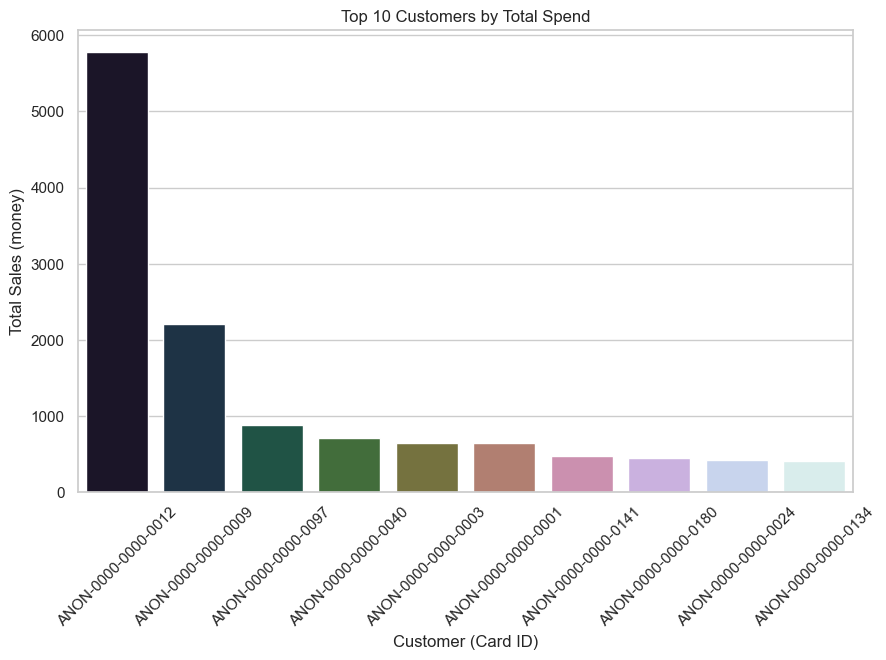

In [22]:
# 6. Top 10 Customers by Total Spend
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_customers.index.astype(str),
    y=top_customers.values,
    palette='cubehelix',
    hue=top_customers.index.astype(str),
    dodge=False,
    legend=False
)
plt.title('Top 10 Customers by Total Spend')
plt.ylabel('Total Sales (money)')
plt.xlabel('Customer (Card ID)')
plt.xticks(rotation=45)
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Check columns
print("Columns in data:", data.columns.tolist())

# Columns to drop (if present)
cols_to_drop = ['money', 'date', 'datetime']
cols_in_data = [col for col in cols_to_drop if col in data.columns]

# Define features and target
X = data.drop(columns=cols_in_data)

if 'money' in data.columns:
    y = data['money']
else:
    raise ValueError("Target column 'money' not found")

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Columns in data: ['datetime', 'cash_type', 'card', 'money', 'coffee_name', 'Month', 'Year', 'Day', 'Hour', 'Weekday', 'Part_of_Day']


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare features and target
cols_to_drop = ['money', 'date', 'datetime']
cols_in_data = [col for col in cols_to_drop if col in data.columns]

X = data.drop(columns=cols_in_data)
y = data['money']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.308261741008897
R^2 Score: 0.9297255827849984


In [27]:
import pandas as pd

coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
Month               -1.000509e+00
Year                 4.363232e-12
Day                 -4.824753e-02
Hour                -1.741663e-02
cash_type_cash       1.265054e+00
...                           ...
Weekday_Tuesday     -3.364959e-01
Weekday_Wednesday   -4.092868e-01
Part_of_Day_Evening -1.454589e-01
Part_of_Day_Morning -3.665368e-01
Part_of_Day_Night    1.743164e-01

[466 rows x 1 columns]


In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g.pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
# Loaddata
coffee_data= pd.read_csv('index.csv')
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [39]:
 coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [40]:
 coffee_data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [41]:
 coffee_data.duplicated().sum()

np.int64(0)

In [42]:
 coffee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [43]:
 coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [44]:
coffee_data[coffee_data['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

<Axes: >

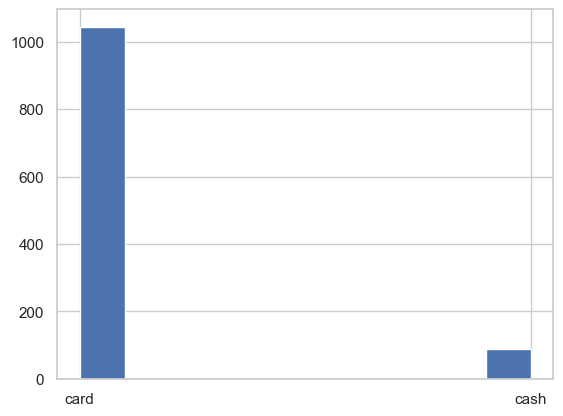

In [45]:
coffee_data['cash_type'].hist()

In [46]:
 coffee_data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [47]:
pd.DataFrame(coffee_data['coffee_name'].value_counts(normalize=
 True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [48]:
 #Convert date and datetime to datetme format
 coffee_data['date']=pd.to_datetime(coffee_data['date'])
 coffee_data['datetime']=pd.to_datetime(coffee_data['datetime'])
 #Create column of Month, Weekdays, and Hours
 coffee_data['month']=coffee_data['date'].dt.strftime('%Y-%m')
 coffee_data['day']=coffee_data['date'].dt.strftime('%w')
 coffee_data['hour']=coffee_data['datetime'].dt.strftime('%H')

In [49]:
 coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [50]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


In [51]:
 [coffee_data['date'].min(),coffee_data['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

In [55]:
revenue_data= coffee_data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

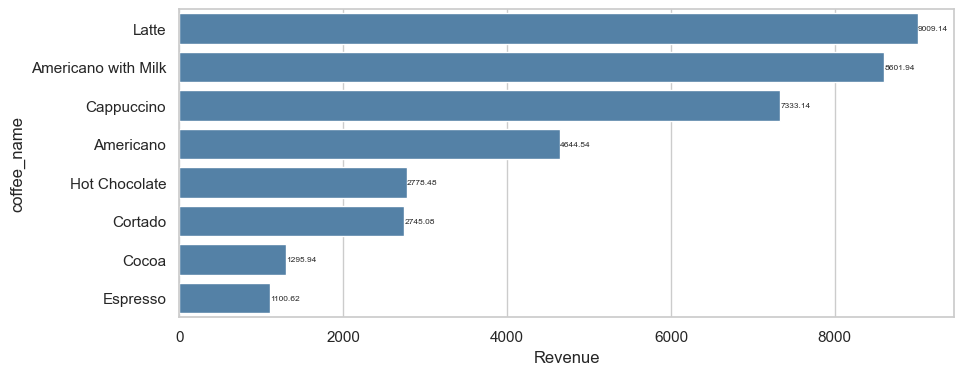

In [56]:
 plt.figure(figsize=(10,4))
 ax= sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
 ax.bar_label(ax.containers[0], fontsize=6)
 plt.xlabel('Revenue')

In [59]:
 monthly_sales = coffee_data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
 monthly_sales


coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


In [60]:
 monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x19406868a50>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

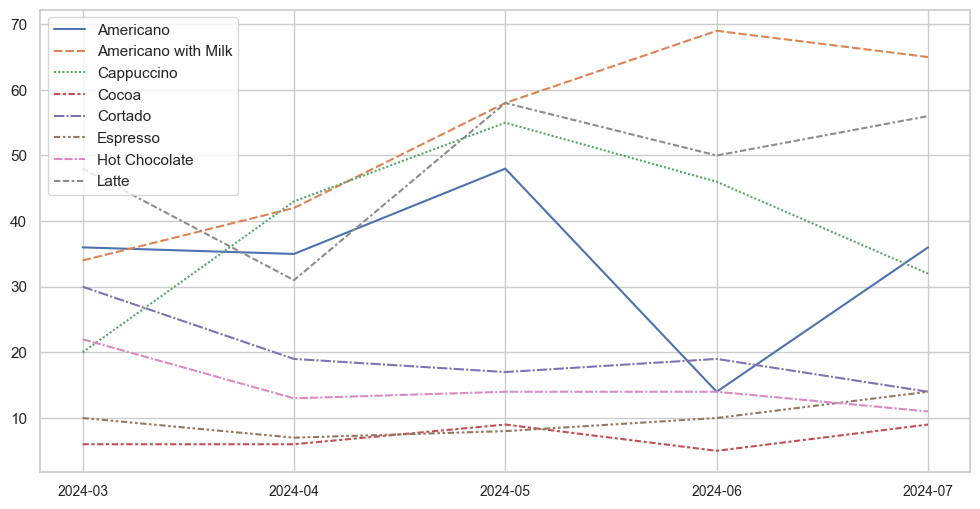

In [64]:
 plt.figure(figsize=(12,6))
 sns.lineplot(data=monthly_sales)
 plt.legend(loc='upper left')
 plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

In [65]:
 weekday_sales = coffee_data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
 weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x19406c15a90>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

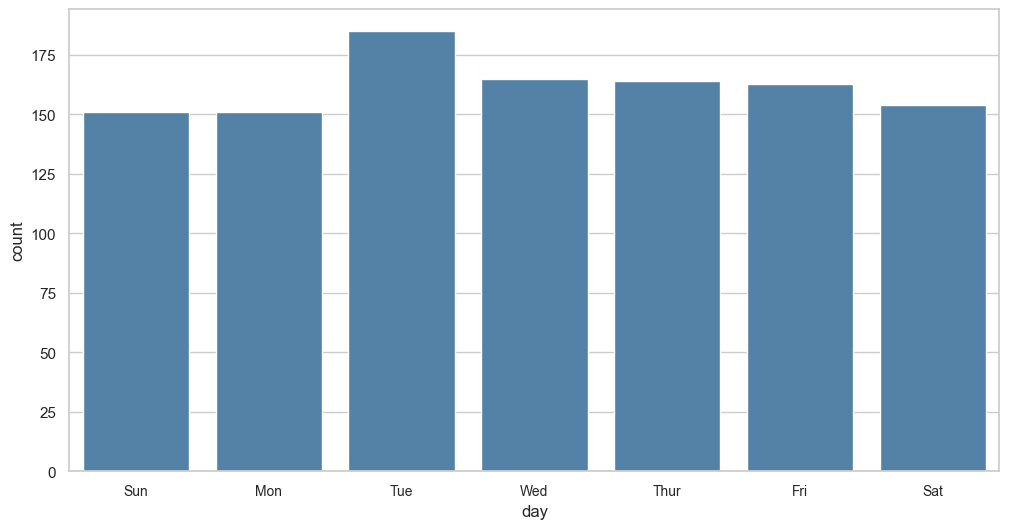

In [66]:
 plt.figure(figsize=(12,6))
 sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
 plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue',
 'Wed','Thur','Fri','Sat'],size='small')

In [68]:
 daily_sales = coffee_data.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'
 }).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
 daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [69]:
 daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


In [71]:
hourly_sales= coffee_data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales
 

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


<Axes: xlabel='hour', ylabel='count'>

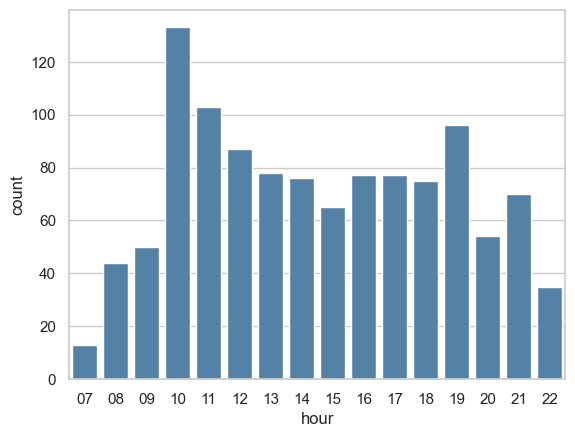

In [72]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')

In [74]:
hourly_sales_by_coffee= coffee_data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',
columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee
 

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,08,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


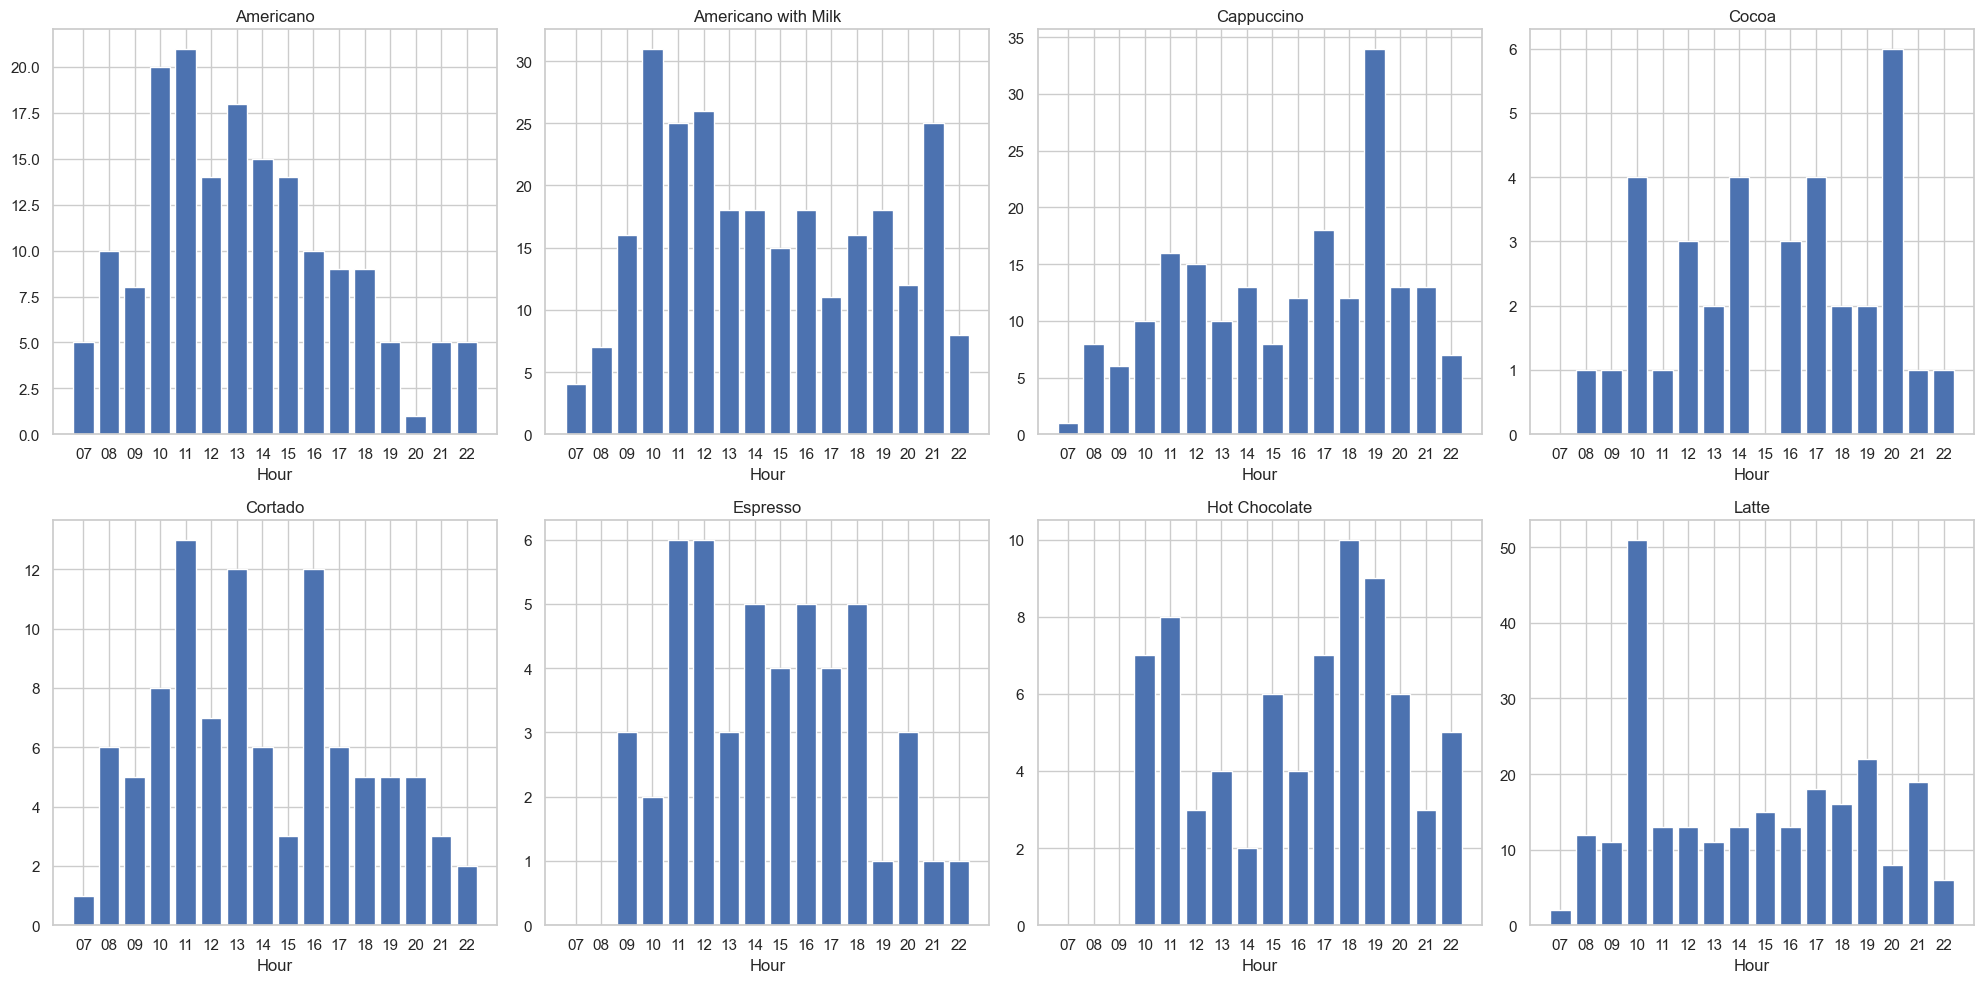

In [80]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
 # Flatten the array of subplots for easy iteration
axs = axs.flatten()
 # Loop through each column in the DataFrame, skipping the'Index' column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
 # Skip the first column ('Index')
    axs[i].bar(hourly_sales_by_coffee['hour'],
hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    #axs[i].set_ylabel('Sales')
plt.tight_layout()
 # Show the plot
plt.show()

In [ ]:
The plots above illustrate the shopping traffic for each product throughout the day. 
Notably, all products experience a peak in traffic around 10:00 AM, withthis trend being particularly pronounced for Latte. 
Additionally, Cappuccino,Cocoa, and Hot Chocolate tend to be more popular during the evening hours,specifically between 6:00pm and 8:00pm.

    
To understand customer behavior, identify high-value clients, analyze product performance, and build a simple model to predict customer spending, 
enabling data-driven decisions for marketing, promotions, and operational optimization.


    
***Analytical Approach***

    
    
Data Cleaning & Preparation: Handled datetime parsing, removed redundant fields, and transformed categorical features using one-hot encoding.

Exploratory Data Analysis (EDA): Used aggregation and visualizations to uncover:

Top-spending customers

Most popular coffee items

Payment trends (e.g., card vs. cash)

Predictive Modeling: Built a Linear Regression model using scikit-learn to predict transaction value based on variables like coffee_name, cash_type, 
and card.


    
Model Evaluation: Assessed performance using Mean Squared Error and R² Score, and interpreted feature importance via model coefficients.  
    
* The top 10 customers significantly outspent the average, highlighting opportunities for loyalty programs or targeted promotions.

* Beverages like Latte and Hot Chocolate were top performers — a potential focus for upselling or bundling.

* The model showed spending is influenced more by product choice and customer history than by payment method alone.


                                                                    ##Conclusion##

    
This project showcases not only technical proficiency in Python, Pandas, visualization, and basic machine learning, but also a deep understanding of how 
to translate raw data into strategic business insights.

Although the original instruction was to use Excel, SQL, or MI tools, the decision to use Jupyter Notebook allowed for a more dynamic, scalable, and 
transparent analytical process — closely aligned with industry standards for Data Analyst and Data Science roles.

It reflects a well-rounded skill set in:

* Data wrangling

* Insight generation

* Predictive analytics

* Communication through visual storytelling

The project is a strong example of how data-driven thinking can enhance business intelligence and support evidence-based decision-making in a retail 
setting.